In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
from sklearn.model_selection import cross_val_score

In [3]:
train = pd.read_csv('Archivos/train_5_features.csv')
test = pd.read_csv('Archivos/test_5_features.csv')

In [4]:
train.head()

,target,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales
0,1,69,13,0.688525,0.424398,1
1,1,38,7,0.688525,0.424398,0
2,1,133,22,0.688525,0.424398,0
3,1,65,8,0.688525,0.424398,1
4,1,88,16,0.688525,0.424398,2


In [6]:
X, y = train.iloc[:,1:], train.iloc[:,0]

In [7]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [30]:
rf = RandomForestClassifier(n_estimators= 100)

In [31]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
preds = rf.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f \t Acertados %i de %i" % (accuracy, trues, preds.size))

Accuracy: 0.866710 	 Acertados 1320 de 1523


In [34]:
def hiperparametrosRF():
    rf = RandomForestClassifier(n_estimators= estimators, max_depth=depth,\
                                min_samples_split=min_split,\
                                min_samples_leaf=min_leaf, max_features=features)
    rf.fit(X_train,y_train)
    preds = rf.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    trues = accuracy_score(y_test, preds, normalize=False)
    print("\tAccuracy: %f \tAcertados %i de %i" % (accuracy, trues, preds.size))

In [35]:
estimators = 100
depth = None
min_split = 2
min_leaf = 1
features = 5

In [36]:
for i in [50,75,100,125,150,200]:
    estimators = i
    print("Estimator %i:" %i)
    hiperparametrosRF()

Estimator 50:
	Accuracy: 0.859488 	Acertados 1309 de 1523
Estimator 75:
	Accuracy: 0.858175 	Acertados 1307 de 1523
Estimator 100:
	Accuracy: 0.862771 	Acertados 1314 de 1523
Estimator 125:
	Accuracy: 0.861458 	Acertados 1312 de 1523
Estimator 150:
	Accuracy: 0.856205 	Acertados 1304 de 1523
Estimator 200:
	Accuracy: 0.864741 	Acertados 1317 de 1523


In [37]:
estimators = 100

In [38]:
for i in [1,3,5,8,10]:
    depth = i
    print("Max_depth %i:" %i)
    hiperparametrosRF()

Max_depth 1:
	Accuracy: 0.765594 	Acertados 1166 de 1523
Max_depth 3:
	Accuracy: 0.864084 	Acertados 1316 de 1523
Max_depth 5:
	Accuracy: 0.869337 	Acertados 1324 de 1523
Max_depth 8:
	Accuracy: 0.876559 	Acertados 1335 de 1523
Max_depth 10:
	Accuracy: 0.871307 	Acertados 1327 de 1523


In [39]:
depth = 10

In [40]:
for i in [3,5,8,15,30,45,60]:
    min_split = i
    print("Min_samples_split %i:" %i)
    hiperparametrosRF()

Min_samples_split 3:
	Accuracy: 0.876559 	Acertados 1335 de 1523
Min_samples_split 5:
	Accuracy: 0.871963 	Acertados 1328 de 1523
Min_samples_split 8:
	Accuracy: 0.869337 	Acertados 1324 de 1523
Min_samples_split 15:
	Accuracy: 0.873276 	Acertados 1330 de 1523
Min_samples_split 30:
	Accuracy: 0.875903 	Acertados 1334 de 1523
Min_samples_split 45:
	Accuracy: 0.875246 	Acertados 1333 de 1523
Min_samples_split 60:
	Accuracy: 0.880499 	Acertados 1341 de 1523


In [41]:
for i in [1,2,3]:
    min_leaf = i
    print("Min_samples_leaf %i:" %i)
    hiperparametrosRF()

Min_samples_leaf 1:
	Accuracy: 0.881156 	Acertados 1342 de 1523
Min_samples_leaf 2:
	Accuracy: 0.875246 	Acertados 1333 de 1523
Min_samples_leaf 3:
	Accuracy: 0.880499 	Acertados 1341 de 1523


In [42]:
for i in [1,2,3,4,5]:
    features = i
    print("Features %i:" %i)
    hiperparametrosRF()

Features 1:
	Accuracy: 0.875903 	Acertados 1334 de 1523
Features 2:
	Accuracy: 0.879186 	Acertados 1339 de 1523
Features 3:
	Accuracy: 0.878529 	Acertados 1338 de 1523
Features 4:
	Accuracy: 0.876559 	Acertados 1335 de 1523
Features 5:
	Accuracy: 0.878529 	Acertados 1338 de 1523


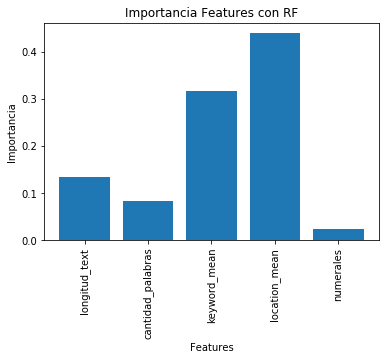

In [43]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation=90)
plt.show()

In [44]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10,\
                                min_samples_split=60,\
                                min_samples_leaf=3)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
test.head()

,id,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales
0,0,34,6,0.688525,0.424398,0
1,2,64,9,0.688525,0.424398,1
2,3,96,19,0.688525,0.424398,0
3,9,40,4,0.688525,0.424398,2
4,11,45,8,0.688525,0.424398,0


In [45]:
preds = rf.predict(test.drop(['id'], axis=1))

In [46]:
preds

array([0, 1, 1, ..., 1, 1, 1])

In [47]:
len(preds)

3263

In [48]:
target = pd.DataFrame({'id':test_df['id'], 'target':preds})

In [49]:
target.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,0


In [179]:
target.to_csv('Submits/submit_random_forest_1.csv', index=False)

#### Prediccion con mas features

In [10]:
train = pd.read_csv('Archivos/train_8_features.csv')
test = pd.read_csv('Archivos/test_8_features.csv')

In [11]:
train.head()

,target,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales,cant_palabras_relevantes,long_palabra_larga,long_palabra_corta
0,1,69,13,0.688525,0.424398,1,8,9,2
1,1,38,7,0.688525,0.424398,0,7,6,2
2,1,133,22,0.688525,0.424398,0,13,7,2
3,1,65,8,0.688525,0.424398,1,8,10,2
4,1,88,16,0.688525,0.424398,2,10,7,3


In [12]:
X, y = train.iloc[:,1:], train.iloc[:,0]

In [13]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
rf = RandomForestClassifier(n_estimators= 100)

In [15]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
preds = rf.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f \t Acertados %i de %i" % (accuracy, trues, preds.size))

Accuracy: 0.870650 	 Acertados 1326 de 1523


In [19]:
estimators = 100
depth = None
min_split = 2
min_leaf = 1
features = 5

In [21]:
for i in [100,125,150,200,300]:
    estimators = i
    print("Estimator %i:" %i)
    hiperparametrosRF()

Estimator 100:
	Accuracy: 0.866710 	Acertados 1320 de 1523
Estimator 125:
	Accuracy: 0.870650 	Acertados 1326 de 1523
Estimator 150:
	Accuracy: 0.871963 	Acertados 1328 de 1523
Estimator 200:
	Accuracy: 0.868680 	Acertados 1323 de 1523
Estimator 300:
	Accuracy: 0.872620 	Acertados 1329 de 1523


In [22]:
estimators = 150

In [23]:
for i in [1,3,5,8,10]:
    depth = i
    print("Max_depth %i:" %i)
    hiperparametrosRF()

Max_depth 1:
	Accuracy: 0.767564 	Acertados 1169 de 1523
Max_depth 3:
	Accuracy: 0.866710 	Acertados 1320 de 1523
Max_depth 5:
	Accuracy: 0.871963 	Acertados 1328 de 1523
Max_depth 8:
	Accuracy: 0.876559 	Acertados 1335 de 1523
Max_depth 10:
	Accuracy: 0.874590 	Acertados 1332 de 1523


In [24]:
depth = 8

In [26]:
for i in [3,5,8,15,30]:
    min_split = i
    print("Min_samples_split %i:" %i)
    hiperparametrosRF()

Min_samples_split 3:
	Accuracy: 0.875903 	Acertados 1334 de 1523
Min_samples_split 5:
	Accuracy: 0.875903 	Acertados 1334 de 1523
Min_samples_split 8:
	Accuracy: 0.877873 	Acertados 1337 de 1523
Min_samples_split 15:
	Accuracy: 0.877873 	Acertados 1337 de 1523
Min_samples_split 30:
	Accuracy: 0.877216 	Acertados 1336 de 1523


In [27]:
min_split = 8

In [28]:
for i in [1,2,3]:
    min_leaf = i
    print("Min_samples_leaf %i:" %i)
    hiperparametrosRF()

Min_samples_leaf 1:
	Accuracy: 0.875903 	Acertados 1334 de 1523
Min_samples_leaf 2:
	Accuracy: 0.875246 	Acertados 1333 de 1523
Min_samples_leaf 3:
	Accuracy: 0.875903 	Acertados 1334 de 1523


In [29]:
for i in [1,2,3,4,5,6,7,8]:
    features = i
    print("Features %i:" %i)
    hiperparametrosRF()

Features 1:
	Accuracy: 0.871307 	Acertados 1327 de 1523
Features 2:
	Accuracy: 0.876559 	Acertados 1335 de 1523
Features 3:
	Accuracy: 0.877216 	Acertados 1336 de 1523
Features 4:
	Accuracy: 0.875903 	Acertados 1334 de 1523
Features 5:
	Accuracy: 0.878529 	Acertados 1338 de 1523
Features 6:
	Accuracy: 0.876559 	Acertados 1335 de 1523
Features 7:
	Accuracy: 0.873933 	Acertados 1331 de 1523
Features 8:
	Accuracy: 0.875246 	Acertados 1333 de 1523


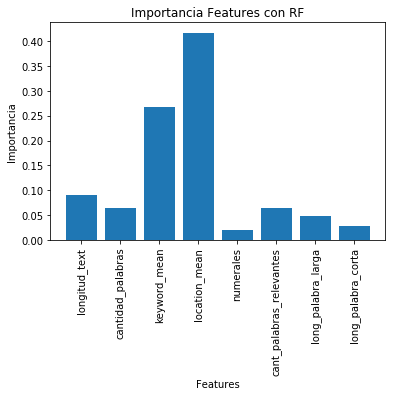

In [32]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation=90)
plt.show()

In [33]:
rf = RandomForestClassifier(n_estimators=150, max_depth=8,\
                                min_samples_split=8,\
                                min_samples_leaf=3)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predicción con Random Forest

In [35]:
test.head()

,id,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales,cant_palabras_relevantes,long_palabra_larga,long_palabra_corta
0,0,34,6,0.688525,0.424398,0,5,7,3
1,2,64,9,0.688525,0.424398,1,7,9,4
2,3,96,19,0.688525,0.424398,0,11,6,1
3,9,40,4,0.688525,0.424398,2,4,9,5
4,11,45,8,0.688525,0.424398,0,6,8,2


In [36]:
preds = rf.predict(test.drop(['id'], axis=1))

In [37]:
preds

array([0, 1, 1, ..., 1, 1, 0])

In [40]:
target = pd.DataFrame({'id':test['id'], 'target':preds})

In [41]:
target.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,0


In [42]:
target.to_csv('Submits/submit_random_forest_2.csv', index=False)

#### Nueva prediccion con menos features

In [59]:
train.head()

,target,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales,cant_palabras_relevantes,long_palabra_larga,long_palabra_corta
0,1,69,13,0.688525,0.424398,1,8,9,2
1,1,38,7,0.688525,0.424398,0,7,6,2
2,1,133,22,0.688525,0.424398,0,13,7,2
3,1,65,8,0.688525,0.424398,1,8,10,2
4,1,88,16,0.688525,0.424398,2,10,7,3


In [82]:
X, y = train.drop(['target','numerales'], axis=1), train.iloc[:,0]

In [83]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [84]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
preds = rf.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f \t Acertados %i de %i" % (accuracy, trues, preds.size))

Accuracy: 0.875246 	 Acertados 1333 de 1523


In [87]:
# Calculo la presición mediante cross validation
scores = cross_val_score(rf, X, y, cv=5)
print("Accuracy: %f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.863521 (+/- 0.040)


In [88]:
# Predigo con menos features
X = train.drop(['target','numerales','long_palabra_corta','long_palabra_larga'], axis=1)
y = train.iloc[:,0]

In [89]:
scores = cross_val_score(rf, X, y, cv=5)
print("Accuracy: %f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.864046 (+/- 0.038)


In [91]:
rf.fit(X,y)
preds = rf.predict(test.drop(['id','numerales','long_palabra_corta','long_palabra_larga'], axis=1))
target = pd.DataFrame({'id':test['id'], 'target':preds})
target.to_csv('Submits/submit_random_forest_3.csv', index=False)